## Tensors
A tensor is a fundamental data structure for neural network. A tensor is generalization of matrix. A 1-dimensional tensor is vector, a two-dimensional tensor is matrix and n-dimensional array is tensor. 

In [70]:
%config IPCompleter.greedy=True #by default the intellisense is not shown. with this line of code, it will

#import PyTorch
#Some tips for modules and installation
#If you encounter module not found, then go to Anaconda Navigator-> Environments->base(root)->Open iphyton
#In the terminal, run command pip install <packagename>

In [30]:
import torch

from torch import optim #optimizaer is used in autograd

In [69]:
def activation(x):
    """ Sigmoid activation function
        Arguements
        ----------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    
    
def show_next_image(data_set:torch.utils.data.DataLoader) -> tuple:
    image, label = iter(data_set).next()
    imshow(image[0,:])
    return image, label

In [4]:
torch.manual_seed(7) #set the random seed so thigns are predictable

features = torch.randn(1, 5) #random nomral variables with five elements

weights = torch.randn_like(features) #true weights for our data. Same shape as features

bias = torch.randn(1,1) #A single value for bias

In [5]:
# Calculate the output for this neural network with input features features, weights, and bias. We will use matrix multiplication
# between features and weights and add bias element to it. The output is then passed on to activiation fucntion to generate the final result

y = activation(torch.sum(features * weights)+bias) #here we do elements by element multiplicatio and bias
print(y)

# alternatively we could use sum function on tensor
y = activation((features*weights).sum() +bias)
print(y)


tensor([[0.1595]])
tensor([[0.1595]])


In [6]:
#use matrix multiplication using torch.mm() for high performance
# We are goign to resize the weights based on teh shape of features. For matrix multiplifcation we want 1 x 5 * 5 x 1. 
# we use view on tensor and specify desired shape to get a new tensor with same data element. The view takes (row, column)
# this is simply saying activation(torch.mm(features, weigths.view(5,1))+bias). 


In [7]:
y = activation(torch.mm(features, weights.view(features.size()[1], features.size()[0])) +bias)
print(y)

tensor([[0.1595]])


## Multilayer Network
We have features and weights.The multiplicaiot of weigth and features makes a hidden units. 

             O           #One output unit 

         h1      h2      #Two hidden units
         
    x1       x2      x3  #Three inpu features
 
Our problem is expressed as below:
y = xi*wi + b

                                                                 [w11 w12]
                                                                 [w11 w12]
     The hidden lay h is calcualed as h=[h1,h2] = [x1,x2,x3..xn].[:    : ]
                                                                 [:    : ]
                                                                 [wn1 wn2]
                                                                


In [8]:


### Generate some data
#set the random seed so we are getting the same set of data each time
torch.manual_seed(7)

#Features are three random normal variables
features = torch.rand((1,3))

#Define the size of each layer in the network
n_input = features.shape[1] #Number of input units, this must match the number of input features. our input features is 1 x 3 matrix and thus we have 3 features in this case
n_hidden = 2 #Number of hidden units
n_output = 1 #Number of outputs


#weigths for input to hidden layer
w1 = torch.rand(n_input, n_hidden)

#Weights for hidden layer to output layer
w2 = torch.randn(n_hidden, n_output)

#Bias
B1 = torch.randn((1,n_hidden))
B1 = torch.randn((1,n_output))


#printing input data
print("Features:")
print(features)

print("Weights of features:")
print(w1)

print("Weights of hidden units:")
print(w2)

h = activation(torch.mm(features, w1)+B1)
output = activation(torch.mm(h, w2)+B1)


print("Hidden Units:")
print(h)
print("Output:")
print(output)




Features:
tensor([[0.5349, 0.1988, 0.6592]])
Weights of features:
tensor([[0.6569, 0.2328],
        [0.4251, 0.2071],
        [0.6297, 0.3653]])
Weights of hidden units:
tensor([[ 0.3775],
        [-0.9509]])
Hidden Units:
tensor([[0.2959, 0.2123]])
Output:
tensor([[0.1409]])


## Numpy to Torch and back
Numpy array and Torch are reversible. Memory is shared. Tensor has datatype information while numpy array does not have that info within the data structure.

In [10]:
import numpy as np               #import numpy
np.random.seed(7)
a = np.random.rand(4,3)          #a numpy array
print(a)
b = torch.from_numpy(a)          #creata a tensor from numpy array\
print(b)                         #note than tensor always have dtype which ndarray does not


[[0.07630829 0.77991879 0.43840923]
 [0.72346518 0.97798951 0.53849587]
 [0.50112046 0.07205113 0.26843898]
 [0.4998825  0.67923    0.80373904]]
tensor([[0.0763, 0.7799, 0.4384],
        [0.7235, 0.9780, 0.5385],
        [0.5011, 0.0721, 0.2684],
        [0.4999, 0.6792, 0.8037]], dtype=torch.float64)


In [11]:
b.numpy()                        #gives back numpy array. Memory is shared between numpy and torch
b.mul_(2)                        #inplace operation of multipying by 2 on tensor, changes the value of numpy array
print(a)                        #Notice the changed values
print(b)


[[0.15261658 1.55983758 0.87681846]
 [1.44693036 1.95597902 1.07699174]
 [1.00224093 0.14410227 0.53687796]
 [0.999765   1.35845999 1.60747807]]
tensor([[0.1526, 1.5598, 0.8768],
        [1.4469, 1.9560, 1.0770],
        [1.0022, 0.1441, 0.5369],
        [0.9998, 1.3585, 1.6075]], dtype=torch.float64)


## Neural Networks in PyTorch
Deep implies network consisteing of massive layers. PyTorch's nn module simplifies the building of network consisteing of matrcies. 

In [37]:
#Import necessary pacakges

#
# Explain what is %matplotlib and %config InlineBackend do
#

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper

import matplotlib.pyplot as plt

#Use MNIST dataset which consists of greyscale hand written digits. 
#Each image is 28x28 pixels. Our goal is to build a neural network 
#that can take one of these images and predict the digit in the image.
from torchvision import datasets, transforms

#define a transform to normalize the data
transform = transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

#Download the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform = transform)

#Everytime we are getting images, we are getting a batch of 64 images.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)



We have the training data loaded into trainloader and we can use iterator and loop through the data.
Using iter is same as using for loop as below:
for image, label in trainloader:
    print(image.shape)


In [31]:
trainloader
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


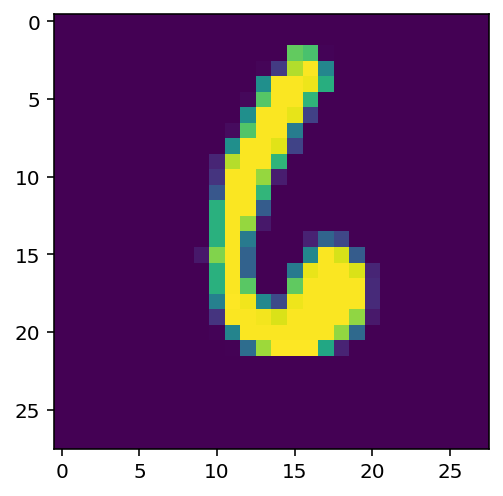

In [38]:
plt.imshow(images[1].numpy().squeeze())

Flatten the batch of images images to build a multi-layer network.
We have 64 images. Each image is of dimension 1 (channel) x 28 (height) x 28 (width). Thus one layer is really (64, 1, 28, 28). When this is flattened, we have 64 x 784 as we flattened teh 2D image to 1D vector.

We have 256 hidden units, and 10 output units using random tensors for the weights and biases. We want 10 output to get probability for each of the numbers 0,1,2..9. 

In the network, we want to pass an image and get out a probability distribution over the classes that tells the likelihood of image belonging to those classes. 

In [41]:
#Activiation function was previously defined (sigmoid)

#Flatten the input images
inputs = images.view(images.shape[0], -1) #-1 is shortcut to match the best shape

#Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1)+b1)
out = torch.mm(h,w2)+b2

print(out)




tensor([[ -4.0037, -10.5920, -15.2532,   1.6932,  18.8478,  13.8026,  -3.8765,
           7.3375, -20.3124,   8.8694],
        [ -3.7280,  -2.2973, -17.0857,   1.9139,  15.2778,   1.5556,   1.2317,
          10.5055, -21.7185,  -0.2940],
        [ -4.4372,  -4.7429, -16.9171,  -0.9745,  16.7698,  12.0000,   2.1957,
          -0.5961, -18.2544,  -4.6790],
        [ -1.9408,  -2.6723, -12.7742,   0.2631,  17.1021,  13.0295,  15.8355,
           8.0205, -21.1886,   0.5963],
        [ -6.8978, -10.9951,  -8.9972,   1.5503,  13.9366,   9.8109,  -2.4642,
          -2.8042, -19.7631,  -8.9857],
        [-11.1233,  -3.1031, -17.2671,  -1.8600,  19.3763,  14.6103,   7.9895,
          -3.6405, -20.4525,  -7.7252],
        [  9.2281,  -9.0607, -13.2973,   1.6014,  25.8930,   9.6311,  12.4725,
          15.1879, -15.0954,  -4.9090],
        [  3.3918,  -4.1994, -17.2525,  -0.3851,  16.1968,   6.7080,  -2.1579,
           9.5091, -20.8402, -10.2223],
        [  3.0596,  -8.4707, -21.2103,   4.5876,

## Softmax function
What does softmax do? 

In [44]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with PyTorch using nn module

In [9]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #input to hidden layer
        self.hidden = nn.Linear(784,256)
        
        #hidden to output
        self.output = nn.Linear(256,10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [47]:
#create a model using the class
model = Network()

In [48]:
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [ ]:
#Alternaive way to build network is using funcational module
#fairly similar to pevious way
#Normally imported as capital F.
# A little succinct


In [8]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #input to hidden layer
        self.hidden = nn.Linear(784,256)
        #hidden to output
        self.output = nn.Linear(256,10)        
        
        
    def forward(self, x):
        #Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        #Output layer with Softmax actication
        x = F.softmax(self.output(x), dim=1)
        
        return x

NameError: name 'nn' is not defined

In [50]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [59]:
#Lets crate a model with two hidden layer with ReLU, one input and one output

model = nn.Sequential(
    nn.Linear(784,128), 
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [78]:
#Define a loss
criterion = nn.NLLLoss()

#get data
images, labels = next(iter(trainloader))

#flatten images
images = images.view(images.shape[0],-1)

#forward pass, get out logits
logps = model(images)

#calculate the loss with the logits and the lables
loss = criterion(logps, labels)
print(loss)

tensor(2.3132, grad_fn=<NllLossBackward>)


In [74]:
#Autograd automatically calcualtes gradients for tensors which is simple a switch for tensors
x = torch.zeros(1, requires_grad=True)
print(x)

#globally it can be set with torch.set_grad_enabled(True | False)

y = x**2
print(y)


tensor([0.], requires_grad=True)
tensor([0.], grad_fn=<PowBackward0>)


True

In [79]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 tensor([[-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        ...,
        [-0.0061, -0.0061, -0.0061,  ..., -0.0061, -0.0061, -0.0061],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012]])
After backward pass: 
 tensor([[-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0037, -0.0037, -0.0037,  ..., -0.0037, -0.0037, -0.0037],
        [-0.0043, -0.0043, -0.0043,  ..., -0.0043, -0.0043, -0.0043],
        ...,
        [-0.0087, -0.0087, -0.0087,  ..., -0.0087, -0.0087, -0.0087],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0048,  0.0048,  0.0048,  ...,  0.0048,  0.0048,  0.0048]])


In [87]:
#Optimizer is used to update teh weights with the gradients. This is available in optim package

from torch import optim

#Optimizer requires the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.001)



print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64,784)

optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output, labels)
loss.backward()

print('Gradient -', model[0].weight.grad)

optimizer.step()
print('Updated weights -', model[0].weight)

Initial weights -  Parameter containing:
tensor([[ 0.0177,  0.0150,  0.0161,  ...,  0.0046,  0.0185, -0.0028],
        [-0.0138, -0.0072,  0.0218,  ...,  0.0114,  0.0220,  0.0060],
        [ 0.0254, -0.0203,  0.0050,  ...,  0.0232, -0.0088, -0.0013],
        ...,
        [ 0.0112,  0.0326, -0.0263,  ..., -0.0066, -0.0066, -0.0119],
        [-0.0239, -0.0044, -0.0199,  ..., -0.0016,  0.0225,  0.0034],
        [-0.0238, -0.0019, -0.0098,  ..., -0.0143, -0.0083,  0.0322]],
       requires_grad=True)
Gradient - tensor([[-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        ...,
        [-0.0053, -0.0053, -0.0053,  ..., -0.0053, -0.0053, -0.0053],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007]])
Updated weights - Parameter containing:
tensor([[ 0.0

In [157]:
#Final Model


model = nn.Sequential(
            nn.Linear(784,128), 
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10),
            nn.LogSoftmax(dim=1)
        )
criterion = nn.NLLLoss()
optimizer = optimizer = optim.SGD(model.parameters(), lr=0.003)
epoch = 5

for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        output = model.forward(images)
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

print('Last loss was 0.2635434596205571')
        

Training loss: 1.8839311325219648
Training loss: 0.8464266434470727
Training loss: 0.5275596583893558
Training loss: 0.4299399269573978
Training loss: 0.3843122311969047
Last loss was 0.2635434596205571


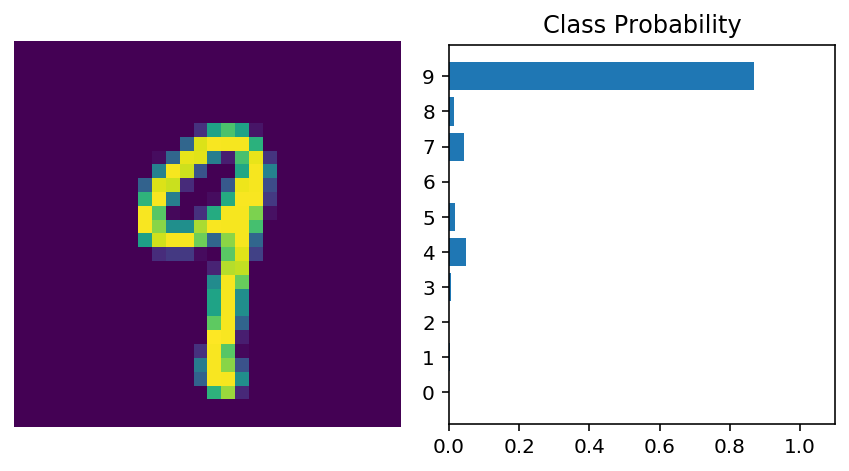

In [176]:
#Lets do prediction now

%matplotlib inline
import helper

images, labels = next(iter(trainloader))
img = images[0].view(1,784)

with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28,28), ps)


In [5]:
#Obtain fasion mnist dataset

#Use MNIST dataset which consists of greyscale hand written digits. 
#Each image is 28x28 pixels. Our goal is to build a neural network 
#that can take one of these images and predict the digit in the image.

from torchvision import datasets, transforms

#define a transform to normalize the data
transform_fashion = transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
training_fashion = datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transform_fashion, target_transform=None)
#Everytime we are getting images, we are getting a batch of 64 images.
train_batch_fashion = torch.utils.data.DataLoader(training_fashion, batch_size=64, shuffle=True)

#We will create a separate test data
testing_fashion = datasets.FashionMNIST(root = "./data", train = False, download = True, transform = transform_fashion, target_transform=None)
#Everytime we are getting images, we are getting a batch of 64 images.
test_batch_fashion = torch.utils.data.DataLoader(training_fashion, batch_size=64, shuffle=True)



In [11]:
#Fashion mnist dataset

#Network architecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [179]:

model = Classifier()    #Define model
criterion = nn.NLLLoss()    #Define criterion
optimizer = optim.Adam(model.parameters(), lr=0.003)    #Define criterion a different one than SDG

epoch = 5



for e in range(epoch):
    running_loss = 0
    for images, labels in train_batch_fashion:
        images[1]
        logps = model(images)    #reshaping is happening in the classifier. This is short cut to passing a model and do forward pass
        loss = criterion(logps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()     
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss}")        

Training loss: 481.3719505518675
Training loss: 370.4101321771741
Training loss: 337.1003274694085
Training loss: 314.69687132537365
Training loss: 295.81192421913147


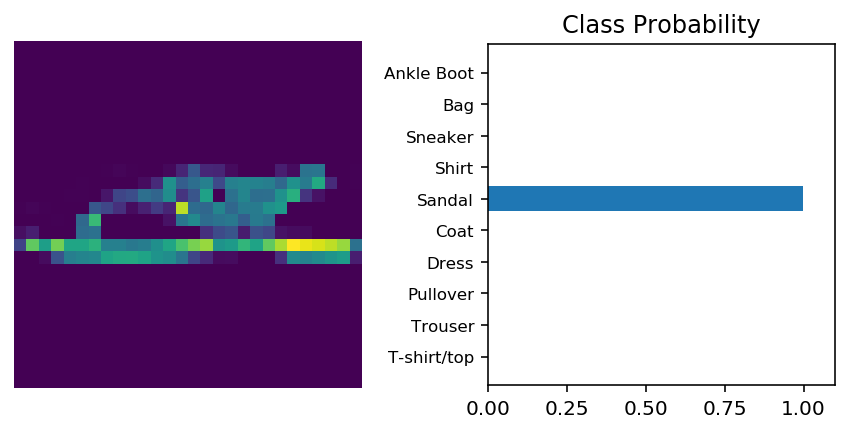

In [191]:
#Predicttion simple
%matplotlib inline
%config InlineBackend.figure_format='retina'

dataiter = iter(train_batch_fashion)
images, labels = dataiter.next()
img = images[1]

ps = torch.exp(model(img))

view_classify(img, ps, version='Fashion')

## Inference and validation

In [28]:
#Do a validation

model = Classifier()
images, labels = next(iter(test_batch_fashion))
#get the class probablities in the test set

ps = torch.exp(model(images))
print(ps.shape)

#see the classification of the top class for the first 10.
top_p, top_class = ps.topk(1,dim=1)
print(top_class[:10,:])

#check if the top class is same as own lable
equals = top_class == labels.view(*top_class.shape)
equals

#check accuracy
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')


torch.Size([64, 10])
tensor([[7],
        [9],
        [7],
        [7],
        [7],
        [9],
        [7],
        [9],
        [9],
        [7]])
Accuracy: 9.375%


In [ ]:
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label = 'Validation loss')
plt.legend(frameon=False)

#The training loss is decreacing ove repochs while validation loss is increaseig. Which is a sign of model overfitting.
# Overfitting can be aoided by using dropout which is simply to add random input which forces the newotk to share information between weights, icreaing its ability 
# to generalize the network data
#Dropbout is used with nn.Dropout in pytorch

#We use dropout during training, but do not use it when getting infernece. So we turn off dropbout by calling model.eval() during testing/valdiation
# To go back in train mode we do moel.trai().


In [33]:
#Revising model with Dropout

#Fashion mnist dataset

#Network architecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(p=.2) 
    
    def forward(self, x):
        x = x.view(x.shape[0], -1) #flatten the input tensor
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        #output does not have dropout
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [47]:
#Lets do this all over again
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

epochs = 5
steps = 0

train_losses, test_losses = [], []
model.eval()
for e in range(epochs):
    running_loss = 0
    for images, labels in train_batch_fashion:
        optimizer.zero_grad()
        logps = model(images)    #reshaping is happening in the classifier. This is short cut to passing a model and do forward pass
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()     
        running_loss += loss.item()
    else:
        test_loss = 0
        accurac = 0
        with torch.no_grad():
            model.eval() # Turns on the inference mode, i.e. dropout disabled.
            for images, labels in test_batch_fashion:
                logps = model(images)
                test_loss += criterion(logps, labels) 
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        #model.train() #enable dropout, going back to train mode.
        train_losses.append(running_loss/len(train_batch_fashion)) 
        test_losses.append(test_loss/len(test_batch_fashion)) 
        
        print("Epoch: {}/{}..".format(e+1, epochs),
             "Training Loss: {:.3f}.. ".format(running_loss/len(train_batch_fashion)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_batch_fashion)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_batch_fashion))
             )

Epoch: 1/5.. Training Loss: 0.517..  Test Loss: 0.394..  Test Accuracy: 6.838
Epoch: 2/5.. Training Loss: 0.391..  Test Loss: 0.337..  Test Accuracy: 7.713
Epoch: 3/5.. Training Loss: 0.355..  Test Loss: 0.343..  Test Accuracy: 8.585
Epoch: 4/5.. Training Loss: 0.332..  Test Loss: 0.304..  Test Accuracy: 9.469
Epoch: 5/5.. Training Loss: 0.316..  Test Loss: 0.304..  Test Accuracy: 10.356


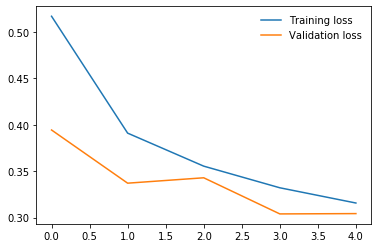

In [48]:
#After doing dropout, we should see training loss and validation loss are closer than when no dropout.
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label = 'Validation loss')
plt.legend(frameon=False)

## Saving and Loading pytorch 
We can save a trained model in model's state_dict. the state dict cotnains the weight and bias matrices for each of the layers.
torch.save can be used to save the model's state_dict to file which can be loaded using torch.load(). The loaded state_dict can be added to the network (i.e. model) using modle.load_state_dict(..). This only works when the model architecture is same which is obvious, but just to make a note for the information.


In [39]:
print("Model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

#Save to file
torch.save(model.state_dict(), 'fashion_model.pth')

#Load the state_dict from file
state_dict = torch.load('fashion_model.pth')

#load the state_dict to the network
model.load_state_dict(state_dict)

Model: 

 Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


<All keys matched successfully>

In [45]:
model = Classifier()
model.state_dict()


OrderedDict([('fc1.weight',
              tensor([[ 0.0289, -0.0005,  0.0186,  ...,  0.0147,  0.0027, -0.0237],
                      [-0.0007,  0.0173, -0.0290,  ...,  0.0224,  0.0163, -0.0284],
                      [-0.0122,  0.0014,  0.0214,  ...,  0.0170, -0.0265,  0.0112],
                      ...,
                      [-0.0351,  0.0289, -0.0298,  ...,  0.0283, -0.0025, -0.0297],
                      [-0.0344,  0.0341, -0.0157,  ..., -0.0287, -0.0091,  0.0337],
                      [ 0.0285, -0.0132, -0.0177,  ..., -0.0156, -0.0191, -0.0031]])),
             ('fc1.bias',
              tensor([ 2.8248e-03, -1.9987e-02,  2.2955e-02,  1.3780e-02,  8.6385e-03,
                       1.9911e-02, -6.6124e-03, -2.7764e-02, -3.2199e-02,  3.1139e-02,
                      -2.2044e-02, -3.2575e-02, -4.4865e-03,  3.0015e-02,  1.8412e-02,
                       1.7496e-02, -1.2799e-03,  2.4719e-02,  1.9255e-02, -2.0534e-02,
                      -1.5504e-02,  2.6108e-02, -3.3306e-02,  2.

## Loading Image Data

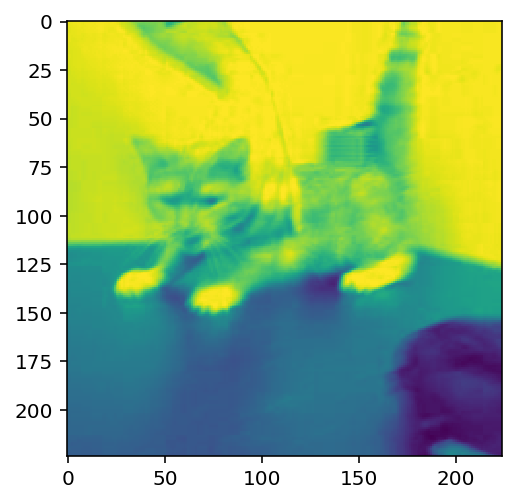

In [74]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                               transforms.CenterCrop(224), transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform = transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
images,labels = next(iter(dataset))

plt.imshow(images[0])
#if image can be seen, then it is good. Else need to check the directory other loading functions.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


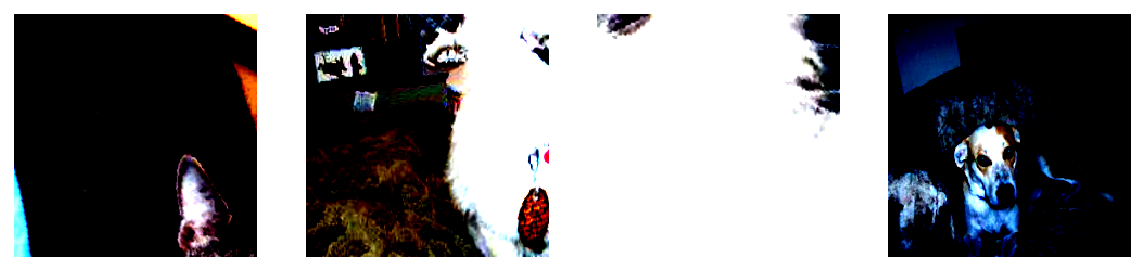

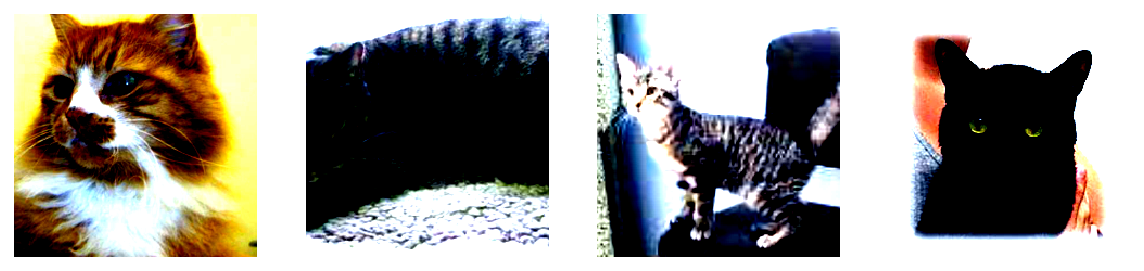

In [78]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

data_dir = 'Cat_Dog_data'

#Define transforms for training data we have to do aumentation such as rotation etc
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

#get a loader for train and test dataset
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

#Lets check if we were able to load the image ata correctly
data_iter = iter(trainloader)
images, labels = next(data_iter)
fir, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)
    
#Same thign from testloader
data_iter = iter(testloader)
images, labels = next(data_iter)
fir, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)


## Transfer Learning
Models trained in other dataset gather knowledge which can be transfered to our own dataset. Built models in torch can be imported form torchvision.

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

#These models used 224x224 sized images.

data_dir = 'Cat_Dog_data'

#Define transforms for training data we have to do aumentation such as rotation etc
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

#get a loader for train and test dataset
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

#We are using a pretrained model
model = models.densenet121(pretrained=True)
model #show the artchitecture


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [81]:
#freese our feature parameters
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.classifier = classifier

In [85]:
import time
#this makes the code device agnostic. Use CUDA if available else use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for device in ['cpu', 'cuda']:

    criterion = nn.NLLLoss()
    # Only train the classifier parameters, feature parameters are frozen
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

    model.to(device)

    for ii, (inputs, labels) in enumerate(trainloader):

        # Move input and label tensors to the GPU
        inputs, labels = inputs.to(device), labels.to(device)

        start = time.time()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if ii==3:
            break
        
    print(f"Device = {device}; Time per batch: {(time.time() - start)/3:.3f} seconds")

KeyboardInterrupt: 

In [86]:
epochs = 1
steps = 0
running_loss = 0
print_every = 5
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()

Epoch 1/1.. Train loss: 0.332.. Test loss: 0.152.. Test accuracy: 0.976
Epoch 1/1.. Train loss: 0.216.. Test loss: 0.089.. Test accuracy: 0.976
Epoch 1/1.. Train loss: 0.188.. Test loss: 0.093.. Test accuracy: 0.967
Epoch 1/1.. Train loss: 0.233.. Test loss: 0.064.. Test accuracy: 0.976
Epoch 1/1.. Train loss: 0.248.. Test loss: 0.059.. Test accuracy: 0.979
Epoch 1/1.. Train loss: 0.143.. Test loss: 0.069.. Test accuracy: 0.973
Epoch 1/1.. Train loss: 0.154.. Test loss: 0.055.. Test accuracy: 0.979
Epoch 1/1.. Train loss: 0.228.. Test loss: 0.057.. Test accuracy: 0.978
Epoch 1/1.. Train loss: 0.157.. Test loss: 0.090.. Test accuracy: 0.966
Epoch 1/1.. Train loss: 0.249.. Test loss: 0.075.. Test accuracy: 0.974
Epoch 1/1.. Train loss: 0.175.. Test loss: 0.065.. Test accuracy: 0.975
Epoch 1/1.. Train loss: 0.230.. Test loss: 0.050.. Test accuracy: 0.983
Epoch 1/1.. Train loss: 0.138.. Test loss: 0.050.. Test accuracy: 0.981
Epoch 1/1.. Train loss: 0.175.. Test loss: 0.059.. Test accuracy

### Transfer learning solution

In [15]:
import torch
from torch import nn #import neural network
from torchvision import datasets, transforms, models #Bring models from torchvision
from torch import optim #import optimizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)



cpu


In [ ]:

model = models.resnet50(pretrained=True)

#Turn off gradients for our model
for param in model.parameters():
    param.requires_grad = False

#Define new classifier

classifier = nn.Sequential(nn.Linear(2048,512), 
                           nn.ReLU(), 
                           nn.Dropout(p=0.2), 
                           nn.Linear(512,2), 
                           nn.LogSoftmax(dim=1))
#attach this classifier to model
model.fc = classifier

#visualize the model 
#model

#Define a loss
criterion = nn.NLLLoss()

#Define optimizer
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device)

epochs = 1
steps = 0
running_loss = 0
print_every = 5

for epoch in range(epochs):
    for images, labels in trainloader:
        steps += 1
        
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0 :
            model.eval() 
            test_loss = 0;
            accuracy = 0; 
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                logps = model(images)
                loss = criterion(logps, labels)
                test_loss += loss.item()
                
                #calculate our accuracy
                ps = torch.exp(logps)
                tops_ps, top_class = ps.topk(1, dim=1)
                equality = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equality.type(torch.FloatTensor)).item()
            
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()
                


Epoch 1/1.. Train loss: 2.663.. Test loss: 3.573.. Test accuracy: 0.488
